<a href="https://colab.research.google.com/github/SwayamBhageria/Stock-price-prediction-using-LSTM/blob/main/Apple%20stock%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error



In [10]:
api_url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=******"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the response JSON
    data = response.json()
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

df = pd.json_normalize(data, 'historical', ['symbol']) #convert into a datframe


In [3]:
final_data = df[['open', 'date']][0:500] #forming filtered dataframe
input_sequences = []
labels = []

#Creating input and output data for time series forecasting
for i in range(len(final_data['open'])):
    if i > 1:
        labels.append(final_data['open'][i])
        input_sequences.append(final_data['open'][i-2:i+1].tolist())

#creating train test split
x_train = np.array(input_sequences[0:400])
x_test = np.array(input_sequences[400:])
y_train = np.array(labels[0:400])
y_test = np.array(labels[400:])


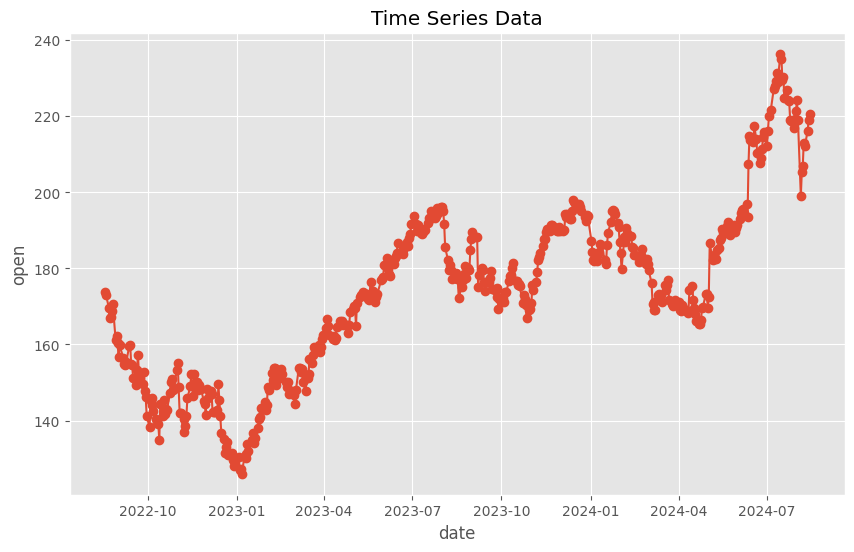

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'][0:500], df['open'][0:500], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('date')
plt.ylabel('open')
plt.title('Time Series Data')

# Display the plot
plt.grid(True)
plt.show()

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 40, batch_size = 64, validation_data = (x_test,y_test))

loss = model.evaluate(x_test, y_test)
prediction = model.predict(x_test)

ann_mse = mean_squared_error(y_test, prediction.flatten())
print(ann_mse)
ann_rmse = np.sqrt(ann_mse)
print(ann_rmse)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 1438.2852 - val_loss: 824.6278
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1286.5587 - val_loss: 879.9291
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1269.8276 - val_loss: 991.2365
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1294.8638 - val_loss: 1040.5688
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1370.5796 - val_loss: 985.5484
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1479.8491 - val_loss: 1011.0782
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1581.3710 - val_loss: 936.2489
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1571.8092 - val_loss: 899.9675
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1393.1863 - val_loss: 846.3591
Epoch 10/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1538.6921 - val_loss: 900.2908
Epoch 11/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1502.3602 - val_loss: 981.0601
Epoch 12/40
7/7 ━━━━━━━━━━━━